# Name : Samer AlTaki
### IOT & Computer Vision 
## Task6 :
### Fault Detection System

#   

#   

In [13]:
# Import libraries and  modules
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [2]:
# Set the folder path 
folder = r"caltech-101/101_ObjectCategories/"

# Define function to load images from folder

def load_images_from_folder(folder, target_size=(128, 128)):
    images = []
    labels = []
    selected_classes = {
        "non-faulty": "airplanes",  # Using the "airplanes" class as an example for non-faulty products
        "faulty": "Faces_easy"      # Using the "Faces_easy" class as an example for faulty products
    }
    
    for label, class_name in selected_classes.items():
        class_folder = os.path.join(folder, class_name)
        for filename in os.listdir(class_folder):
            img = cv2.imread(os.path.join(class_folder, filename))
            if img is not None:
                img_resized = cv2.resize(img, target_size)
                img_normalized = img_resized.astype("float32") / 255.0
                images.append(img_normalized)
                labels.append(label)
    return images, labels


In [3]:
# Load and preprocess the dataset

images, labels = load_images_from_folder(folder)
images = np.array(images) / 255.0

if len(labels) == 0:
    print("No data found. Please check the dataset path.")
else:
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    num_classes = np.max(integer_encoded) + 1 if integer_encoded.size > 0 else 0
    labels = to_categorical(integer_encoded, num_classes=num_classes)

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [5]:
# Define the CNN model
def create_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]
model = create_cnn(input_shape, num_classes)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)



Epoch 1/10
25/25 [==============================] - 94s 4s/step - loss: 0.6564 - accuracy: 0.6405 - val_loss: 0.6632 - val_accuracy: 0.6313
Epoch 2/10
25/25 [==============================] - 93s 4s/step - loss: 0.5472 - accuracy: 0.7203 - val_loss: 0.3463 - val_accuracy: 0.9091
Epoch 3/10
25/25 [==============================] - 93s 4s/step - loss: 0.2571 - accuracy: 0.9354 - val_loss: 0.1859 - val_accuracy: 0.9596
Epoch 4/10
25/25 [==============================] - 94s 4s/step - loss: 0.1132 - accuracy: 0.9671 - val_loss: 0.0815 - val_accuracy: 0.9747
Epoch 5/10
25/25 [==============================] - 94s 4s/step - loss: 0.0941 - accuracy: 0.9658 - val_loss: 0.1088 - val_accuracy: 0.9646
Epoch 6/10
25/25 [==============================] - 97s 4s/step - loss: 0.0849 - accuracy: 0.9646 - val_loss: 0.0823 - val_accuracy: 0.9747
Epoch 7/10
25/25 [==============================] - 93s 4s/step - loss: 0.0503 - accuracy: 0.9823 - val_loss: 0.0649 - val_accuracy: 0.9848
Epoch 8/10
25/25 [==

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

#Save the Model
model.save('FaultDetection.h5')

8/8 [==============================] - 9s 1s/step - loss: 0.0162 - accuracy: 0.9960
Test loss: 0.016221394762396812, Test accuracy: 0.9959514141082764


In [7]:
# Load and preprocess image
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path)
    if img is not None:
        img_resized = cv2.resize(img, target_size)
        img_normalized = img_resized.astype("float32") / 255.0
        return img_normalized
    return None


In [16]:
# Use the trained model to make predictions on the preprocessed image
model = load_model('FaultDetection.h5') 

Predicted label: faulty


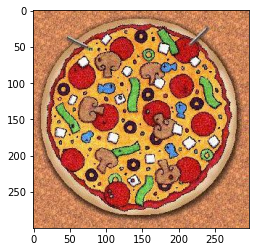

In [29]:
# Path to test image
test_image_path = "caltech-101\101_ObjectCategories\pizza/image_0027.jpg"

test_image = load_and_preprocess_image(test_image_path)

# Add a batch dimension to the image (the model expects a batch of images as input)
test_image_batch = np.expand_dims(test_image, axis=0)
test_image_batch=tf.convert_to_tensor(X_train, dtype=tf.float32)


# Make a prediction
predictions = model.predict(test_image_batch)

# Get the class with the highest probability
predicted_class = np.argmax(predictions[0])

# Decode the predicted class back to its label
predicted_label = label_encoder.inverse_transform([predicted_class])[0]

print(f"Predicted label: {predicted_label}")
img=cv2.imread("image_0027.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
